In [3]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [4]:
data = pd.read_csv('dataset.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13627 entries, 0 to 13626
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   primaryid      13627 non-null  int64  
 1   caseid         13627 non-null  int64  
 2   drug_seq       13627 non-null  int64  
 3   role_cod       13627 non-null  object 
 4   drugname       13627 non-null  object 
 5   prod_ai        13627 non-null  object 
 6   route          13409 non-null  object 
 7   dose_amt       7014 non-null   float64
 8   event_dt       10754 non-null  float64
 9   mfr_dt         13567 non-null  float64
 10  age            11066 non-null  float64
 11  age_grp        11066 non-null  object 
 12  sex            13232 non-null  object 
 13  wt             13627 non-null  float64
 14  occr_country   13627 non-null  object 
 15  indi_drug_seq  13612 non-null  float64
 16  indi_pt        13612 non-null  object 
 17  outc_cod       11387 non-null  object 
 18  pt    

In [4]:
data.describe()

,primaryid,caseid,drug_seq,dose_amt,event_dt,mfr_dt,age,wt,indi_drug_seq,dsg_drug_seq
count,1.362700e+04,1.362700e+04,13627.000000,7014.000000,10754.000000,13567.000000,11066.000000,13627.000000,13612.000000,11573.000000
mean,7.051987e+08,1.414254e+07,9.233654,296.745238,2019.315789,2019.685487,51.795319,77.137814,1.008522,1.039402
std,5.326832e+08,2.968381e+06,10.155232,98.535598,2.560485,0.578050,17.663965,14.971888,0.155002,0.362667
min,7.993046e+07,7.056790e+06,1.000000,0.100000,2009.000000,2005.000000,3.000000,11.350000,1.000000,1.000000
25%,1.739594e+08,1.172587e+07,2.000000,300.000000,2018.000000,2019.000000,40.000000,65.000000,1.000000,1.000000
50%,8.609198e+08,1.438304e+07,6.000000,300.000000,2019.000000,2020.000000,55.000000,76.000000,1.000000,1.000000
75%,1.189729e+09,1.732467e+07,13.000000,375.000000,2021.000000,2020.000000,65.000000,88.000000,1.000000,1.000000
max,1.670401e+09,1.760662e+07,68.000000,3000.000000,2024.000000,2020.000000,89.000000,259.000000,5.000000,25.000000


In [5]:
gender_distribution = data['sex'].value_counts().reset_index()
gender_distribution.columns = ['Category', 'No. of Reports']
gender_distribution['Report(%)'] = (gender_distribution['No. of Reports'] / gender_distribution['No. of Reports'].sum()) * 100
gender_distribution_table = gender_distribution.to_markdown(index=False)

age_group_distribution = data['age_grp'].value_counts().reset_index()
age_group_distribution.columns = ['Category', 'No. of Reports']
age_group_distribution['Report(%)'] = (age_group_distribution['No. of Reports'] / age_group_distribution['No. of Reports'].sum()) * 100


country_distribution = data['occr_country'].value_counts().reset_index()
country_distribution.columns = ['Category', 'No. of Reports']
country_distribution['Report(%)'] = (country_distribution['No. of Reports'] / country_distribution['No. of Reports'].sum()) * 100

year_distribution = data['event_dt'].value_counts().reset_index()  # Assuming event_dt contains the year
year_distribution.columns = ['Category', 'No. of Reports']
year_distribution['Report(%)'] = (year_distribution['No. of Reports'] / year_distribution['No. of Reports'].sum()) * 100

gender_distribution_table = gender_distribution.to_markdown(index=False)
age_group_distribution_table = age_group_distribution.to_markdown(index=False)
year_distribution_table = year_distribution.to_markdown(index=False)
country_distribution_table = country_distribution.to_markdown(index=False)

print("Gender Distribution")
print(gender_distribution_table)


Gender Distribution
| Category   |   No. of Reports |   Report(%) |
|:-----------|-----------------:|------------:|
| F          |             9134 |     69.0296 |
| M          |             4098 |     30.9704 |


In [6]:
print("\nAge Group Distribution")
print(age_group_distribution_table)



Age Group Distribution
| Category   |   No. of Reports |   Report(%) |
|:-----------|-----------------:|------------:|
| A          |             6377 |    57.627   |
| E          |             4067 |    36.7522  |
| T          |              405 |     3.65986 |
| C          |              217 |     1.96096 |


In [7]:
print("\nReport Year Distribution")
print(year_distribution_table)



Report Year Distribution
|   Category |   No. of Reports |   Report(%) |
|-----------:|-----------------:|------------:|
|       2020 |             1602 |   14.8968   |
|       2019 |             1576 |   14.655    |
|       2023 |             1297 |   12.0606   |
|       2018 |             1267 |   11.7817   |
|       2021 |             1237 |   11.5027   |
|       2017 |             1165 |   10.8332   |
|       2022 |              963 |    8.95481  |
|       2016 |              875 |    8.13651  |
|       2015 |              315 |    2.92914  |
|       2024 |              142 |    1.32044  |
|       2014 |              121 |    1.12516  |
|       2013 |              111 |    1.03217  |
|       2011 |               46 |    0.427748 |
|       2010 |               24 |    0.223173 |
|       2009 |               13 |    0.120885 |


In [8]:
print("\nReport Country Distribution")
print(country_distribution_table)


Report Country Distribution
| Category   |   No. of Reports |   Report(%) |
|:-----------|-----------------:|------------:|
| CA         |            10376 | 76.143      |
| US         |             2639 | 19.366      |
| BR         |              231 |  1.69516    |
| JP         |               65 |  0.476994   |
| PA         |               39 |  0.286197   |
| ZA         |               34 |  0.249505   |
| DE         |               30 |  0.220151   |
| FR         |               29 |  0.212813   |
| CO         |               23 |  0.168783   |
| AU         |               19 |  0.139429   |
| GB         |               14 |  0.102737   |
| IE         |               13 |  0.0953988  |
| GR         |                9 |  0.0660454  |
| ES         |                8 |  0.058707   |
| SA         |                8 |  0.058707   |
| IT         |                8 |  0.058707   |
| BE         |                7 |  0.0513686  |
| MX         |                6 |  0.0440302  |
| PT       

In [9]:
top_20_adverse_events = data['indi_pt'].value_counts().head(20).reset_index()
top_20_adverse_events.columns = ['Adverse Event', 'No. of Occurrences']
top_20_adverse_events['Report(%)'] = (top_20_adverse_events['No. of Occurrences'] / data.shape[0]) * 100

top_20_adverse_events_table = top_20_adverse_events.to_markdown(index=False)


print(top_20_adverse_events_table)

| Adverse Event                         |   No. of Occurrences |   Report(%) |
|:--------------------------------------|---------------------:|------------:|
| Asthma                                |                 9752 |  71.5638    |
| Chronic spontaneous urticaria         |                 1546 |  11.3451    |
| Product used for unknown indication   |                 1182 |   8.67396   |
| Idiopathic urticaria                  |                  376 |   2.75923   |
| Urticaria                             |                  313 |   2.29691   |
| Urticaria chronic                     |                   57 |   0.418287  |
| Chronic obstructive pulmonary disease |                   28 |   0.205474  |
| Dermatitis atopic                     |                   20 |   0.146767  |
| Immunodeficiency common variable      |                   20 |   0.146767  |
| Hypertension                          |                   16 |   0.117414  |
| Cystic fibrosis                       |           

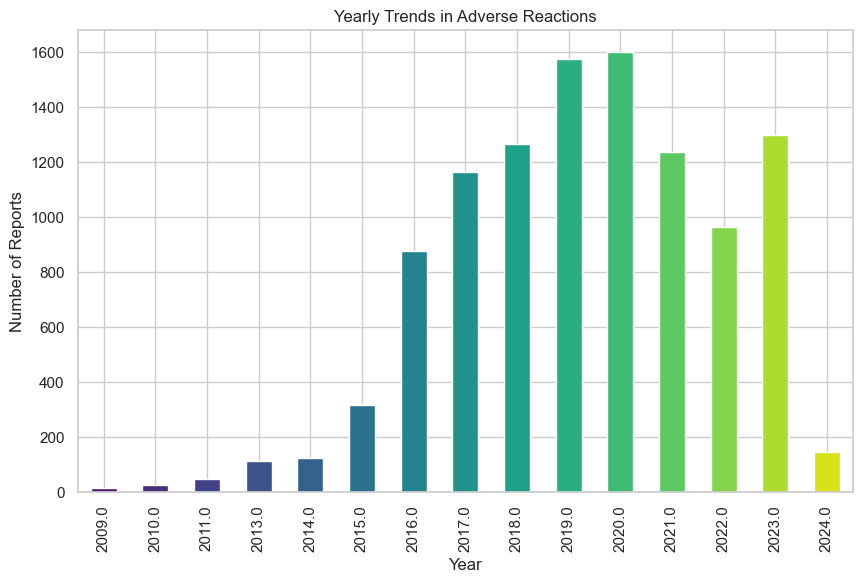

In [10]:
sns.set(style="whitegrid")

# 1. Yearly Trends in Adverse Reactions
plt.figure(figsize=(10, 6))
yearly_trends = data['event_dt'].value_counts().sort_index()
yearly_trends.plot(kind='bar', color=sns.color_palette("viridis", len(yearly_trends)))
plt.title('Yearly Trends in Adverse Reactions')
plt.xlabel('Year')
plt.ylabel('Number of Reports')
plt.show()

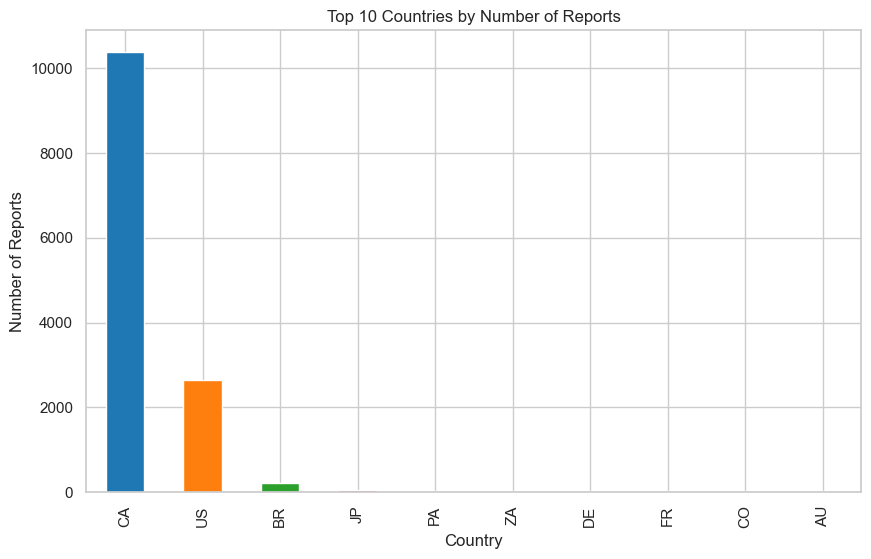

In [11]:
# 2. Top 10 Countries by Number of Reports
plt.figure(figsize=(10, 6))
top_10_countries = data['occr_country'].value_counts().head(10)
top_10_countries.plot(kind='bar', color=sns.color_palette("tab10", len(top_10_countries)))
plt.title('Top 10 Countries by Number of Reports')
plt.xlabel('Country')
plt.ylabel('Number of Reports')
plt.show()

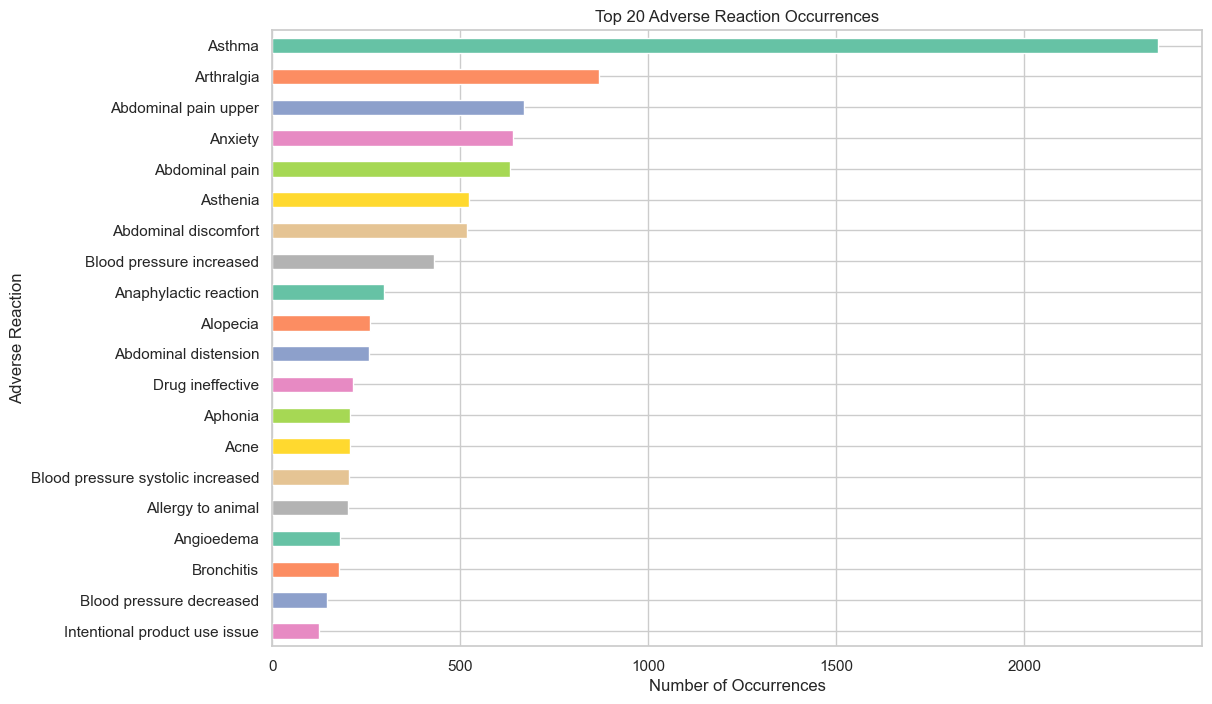

In [12]:
# 3. Top 20 Adverse Reactions Occurrences
plt.figure(figsize=(12, 8))
top_20_reactions = data['pt'].value_counts().head(20)
top_20_reactions.plot(kind='barh', color=sns.color_palette("Set2", len(top_20_reactions)))
plt.title('Top 20 Adverse Reaction Occurrences')
plt.xlabel('Number of Occurrences')
plt.ylabel('Adverse Reaction')
plt.gca().invert_yaxis()  
plt.show()

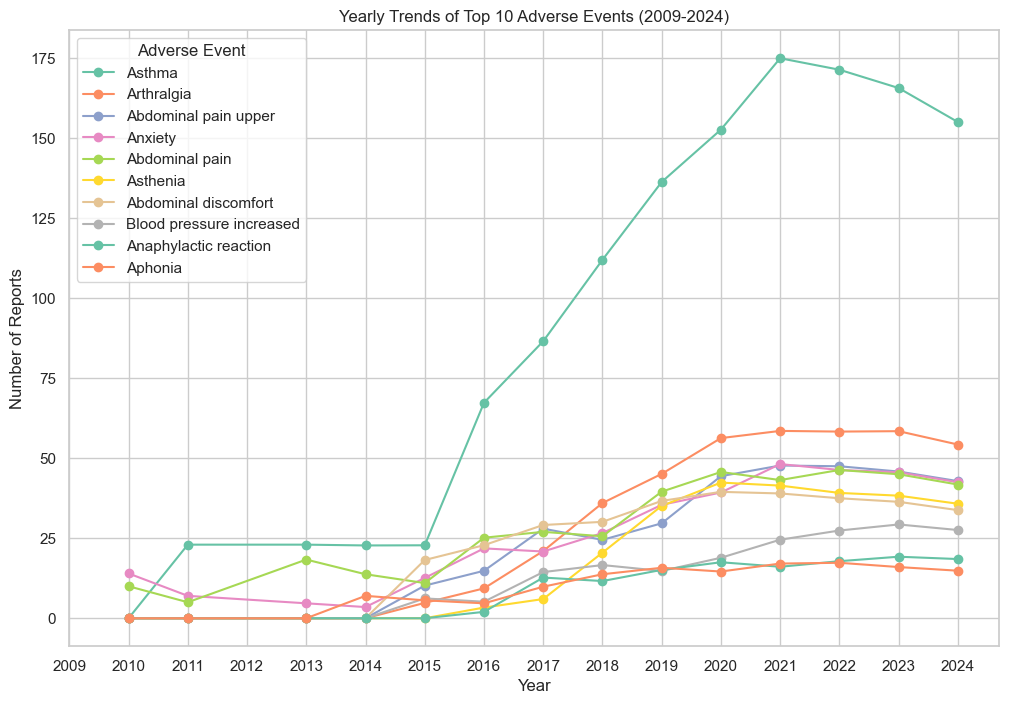

In [13]:

data = data.dropna(subset=['event_dt'])
data['year'] = data['event_dt']
top_10_adverse_events = data['pt'].value_counts().head(10).index
top_10_data = data[data['pt'].isin(top_10_adverse_events)]
yearly_counts = top_10_data.groupby(['year', 'pt']).size().unstack(fill_value=0)
smoothed_counts = yearly_counts.rolling(window=410, min_periods=1).mean()


plt.figure(figsize=(12, 8))
sns.set_palette("Set2")

for event in top_10_adverse_events:
    plt.plot(smoothed_counts.index, smoothed_counts[event], marker='o', label=event)

plt.title('Yearly Trends of Top 10 Adverse Events (2009-2024)')
plt.xlabel('Year')
plt.ylabel('Number of Reports')
plt.xticks(range(2009, 2025))  
plt.legend(title='Adverse Event')
plt.grid(True)
plt.show()


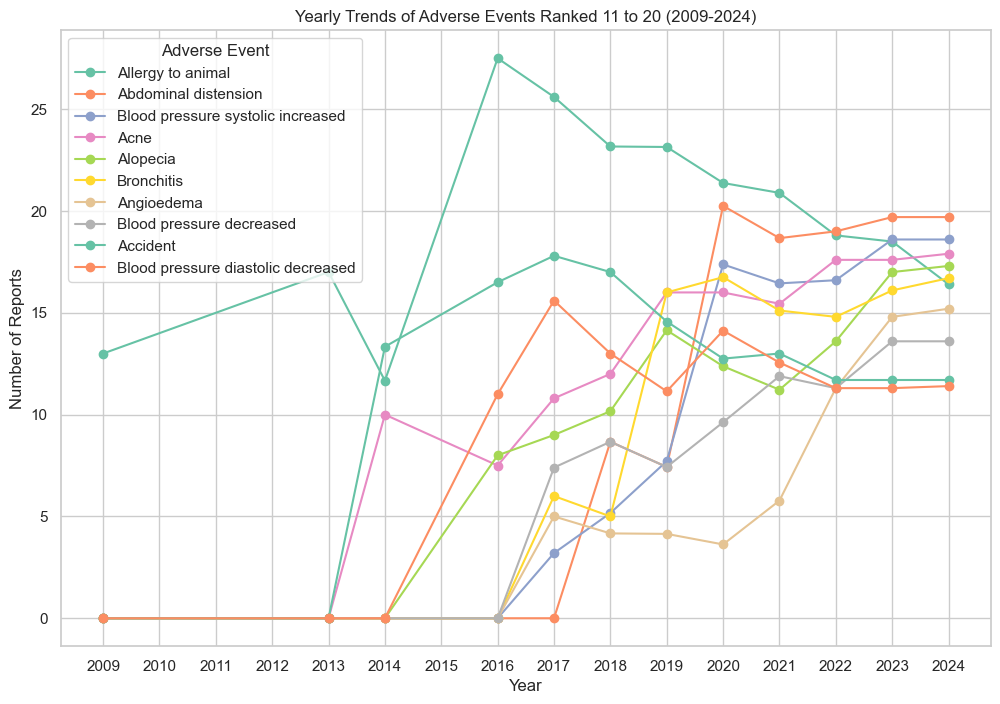

In [14]:
adverse_events_11_to_20 = data['pt'].value_counts().iloc[10:20].index
events_11_to_20_data = data[data['pt'].isin(adverse_events_11_to_20)]
yearly_counts = events_11_to_20_data.groupby(['year', 'pt']).size().unstack(fill_value=0)
smoothed_counts = yearly_counts.rolling(window=10, min_periods=1).mean()


plt.figure(figsize=(12, 8))
sns.set_palette("Set2")

for event in adverse_events_11_to_20:
    plt.plot(smoothed_counts.index, smoothed_counts[event], marker='o', label=event)

plt.title('Yearly Trends of Adverse Events Ranked 11 to 20 (2009-2024)')
plt.xlabel('Year')
plt.ylabel('Number of Reports')
plt.xticks(range(2009, 2025))  
plt.legend(title='Adverse Event')
plt.grid(True)
plt.show()

In [15]:
age_group_labels = {
    'N': 'Neonate',
    'I': 'Infant',
    'C': 'Child',
    'T': 'Adolescent',
    'A': 'Adult',
    'E': 'Elderly'
}
data['age_grp'] = data['age_grp'].map(age_group_labels)
age_group_freq = data.groupby(['pt', 'age_grp']).size().unstack(fill_value=0)

top_10_events = data['pt'].value_counts().head(10).index
top_10_age_group_freq = age_group_freq.loc[top_10_events]

for col in top_10_age_group_freq.columns:
    top_10_age_group_freq[f'{col} (%)'] = (top_10_age_group_freq[col] / top_10_age_group_freq.sum(axis=1)) * 100

top_10_age_group_freq['Total'] = top_10_age_group_freq[age_group_freq.columns].sum(axis=1)

ordered_columns = []
for col in age_group_freq.columns:
    ordered_columns.append(col)
    ordered_columns.append(f'{col} (%)')
ordered_columns.append('Total')


top_10_age_group_freq = top_10_age_group_freq[ordered_columns]
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print(top_10_age_group_freq)

age_grp                   Adolescent  Adolescent (%)  Adult  Adult (%)  Child  \
pt                                                                              
Asthma                           118        5.608365   1071  50.767717     43   
Arthralgia                         0        0.000000    235  32.060027      2   
Abdominal pain upper               9        1.573427    323  56.313627      2   
Anxiety                           22        3.949731    375  66.850910      3   
Abdominal pain                     6        1.061947    483  85.326350     30   
Asthenia                           0        0.000000    240  53.215078      5   
Abdominal discomfort              37        8.726415    145  33.508470      8   
Blood pressure increased           0        0.000000    291  75.979112      6   
Anaphylactic reaction             37       14.566929    206  76.703413     10   
Aphonia                            0        0.000000    142  68.269231     27   

age_grp                   C

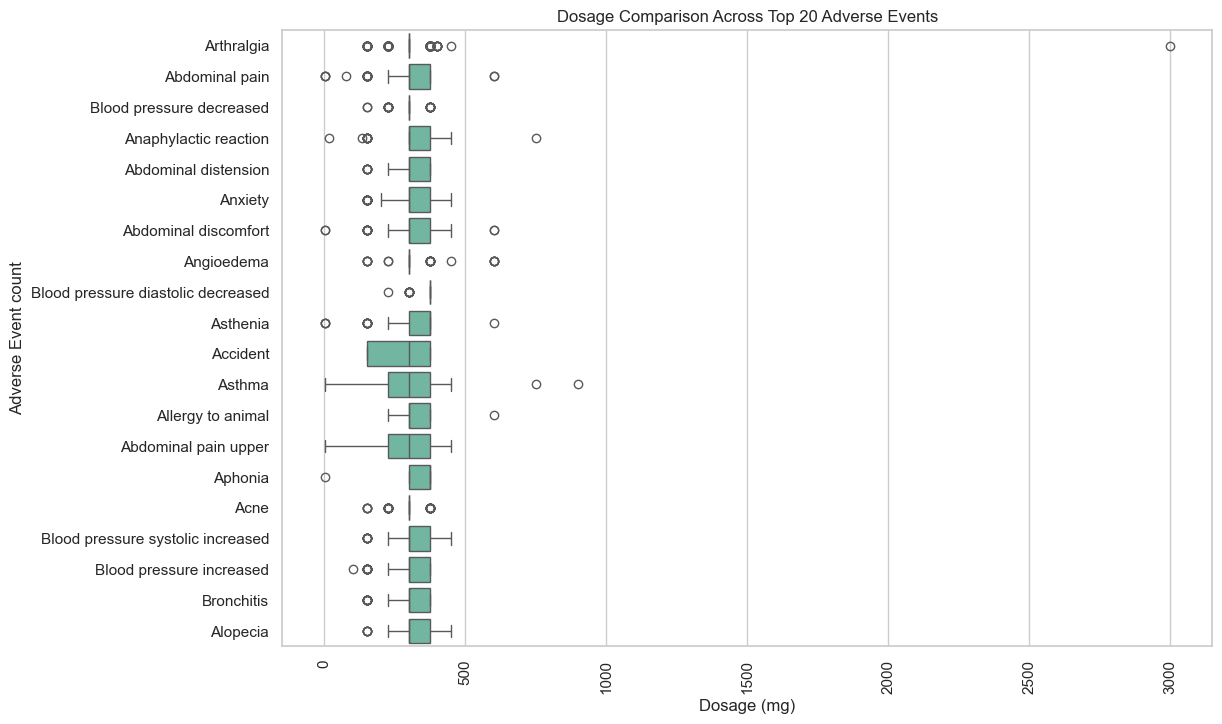

In [16]:
data['dose_amt'] = pd.to_numeric(data['dose_amt'], errors='coerce')
data = data.dropna(subset=['dose_amt'])

top_20_events = data['pt'].value_counts().head(20).index
top_20_data = data[data['pt'].isin(top_20_events)]

plt.figure(figsize=(12, 8))
sns.boxplot(y='pt', x='dose_amt', data=top_20_data)
plt.xticks(rotation=90)
plt.title('Dosage Comparison Across Top 20 Adverse Events')
plt.ylabel('Adverse Event count')
plt.xlabel('Dosage (mg)')
plt.show()

Number of anomalies detected: 258
      primaryid    caseid  drug_seq role_cod drugname     prod_ai  \
723  1067004613  10670046         1       PS   XOLAIR  OMALIZUMAB   
734  1067004613  10670046        12       SS   XOLAIR  OMALIZUMAB   
736  1067004613  10670046        14       SS   XOLAIR  OMALIZUMAB   
737  1067004613  10670046        15       SS   XOLAIR  OMALIZUMAB   
846  1095182817  10951828         1       PS   XOLAIR  OMALIZUMAB   

            route  dose_amt  event_dt  mfr_dt   age     age_grp sex    wt  \
723  Subcutaneous     225.0    2016.0  2020.0  10.0       Child   F  92.0   
734  Subcutaneous     225.0    2016.0  2020.0  10.0       Child   F  82.0   
736  Subcutaneous     225.0    2016.0  2020.0  10.0       Child   F  76.0   
737  Subcutaneous     225.0    2016.0  2020.0  10.0       Child   F  66.0   
846  Subcutaneous     150.0    2018.0  2020.0  13.0  Adolescent   F  91.0   

    occr_country  indi_drug_seq indi_pt outc_cod      pt  dsg_drug_seq  \
723           

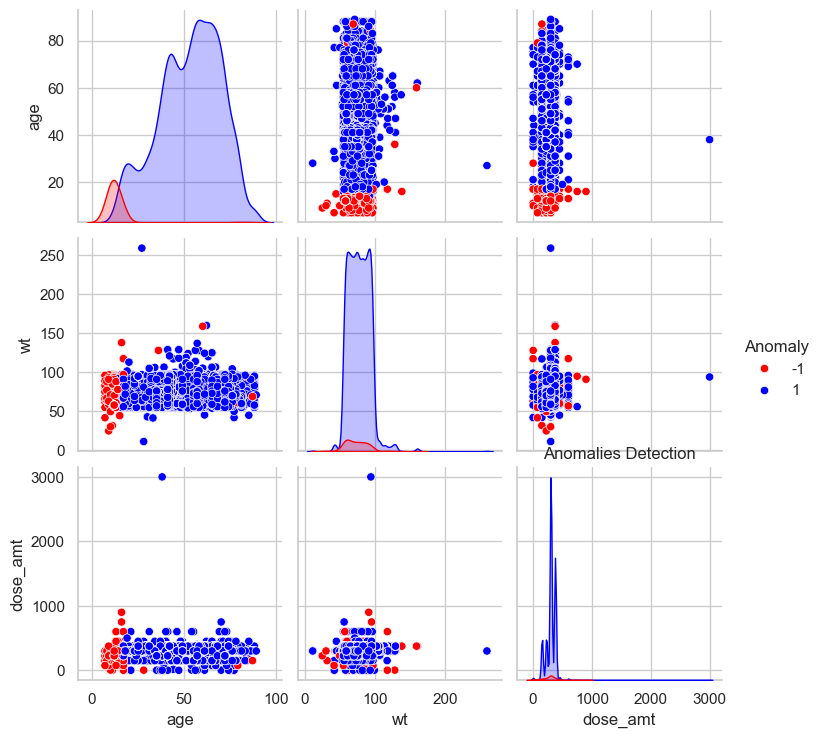

In [17]:
# detecting anomalies
features = ['age', 'wt', 'dose_amt', 'sex', 'age_grp','role_cod','event_dt']
data = data.dropna(subset=features)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'wt', 'dose_amt']),
        ('cat', OneHotEncoder(), ['sex', 'age_grp'])
    ]
)


isolation_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=69)  

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('isolation_forest', isolation_forest)])

pipeline.fit(data[features])


data['Anomaly'] = pipeline.named_steps['isolation_forest'].predict(pipeline.named_steps['preprocessor'].transform(data[features]))

anomalies = data[data['Anomaly'] == -1]
print(f"Number of anomalies detected: {len(anomalies)}")
print(anomalies.head())
sns.pairplot(data, hue='Anomaly', vars=['age', 'wt', 'dose_amt'], palette={1: 'blue', -1: 'red'})
plt.title('Anomalies Detection')
plt.show()


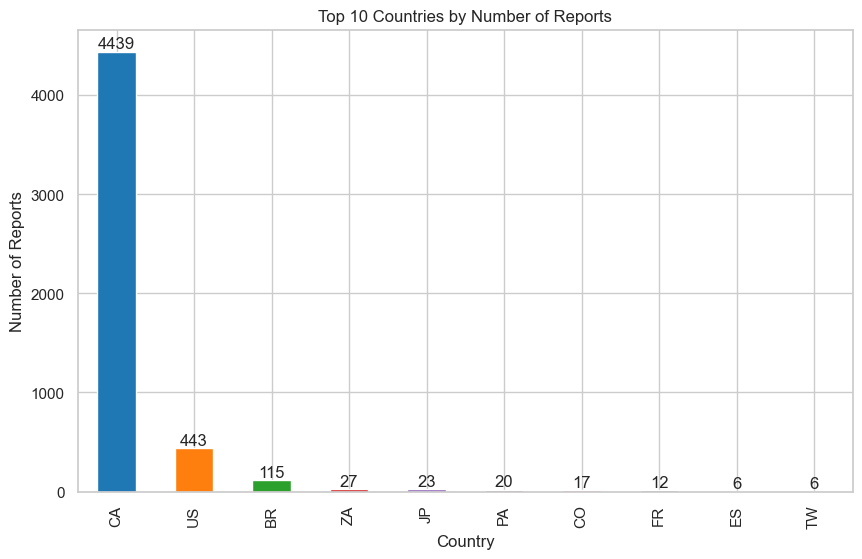

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
top_10_countries = data['occr_country'].value_counts().head(10)
ax = top_10_countries.plot(kind='bar', color=sns.color_palette("tab10", len(top_10_countries)))


for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height(), 
            int(i.get_height()), ha='center', va='bottom')

plt.title('Top 10 Countries by Number of Reports')
plt.xlabel('Country')
plt.ylabel('Number of Reports')
plt.show()


In [37]:
!pip install wordcloud


   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/301.4 kB 1.3 MB/s eta 0:00:01
   ---------------- ----------------------- 122.9/301.4 kB 1.8 MB/s eta 0:00:01
   ------------------------------- -------- 235.5/301.4 kB 2.0 MB/s eta 0:00:01
   ------------------------------- -------- 235.5/301.4 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 301.4/301.4 kB 1.7 MB/s eta 0:00:00


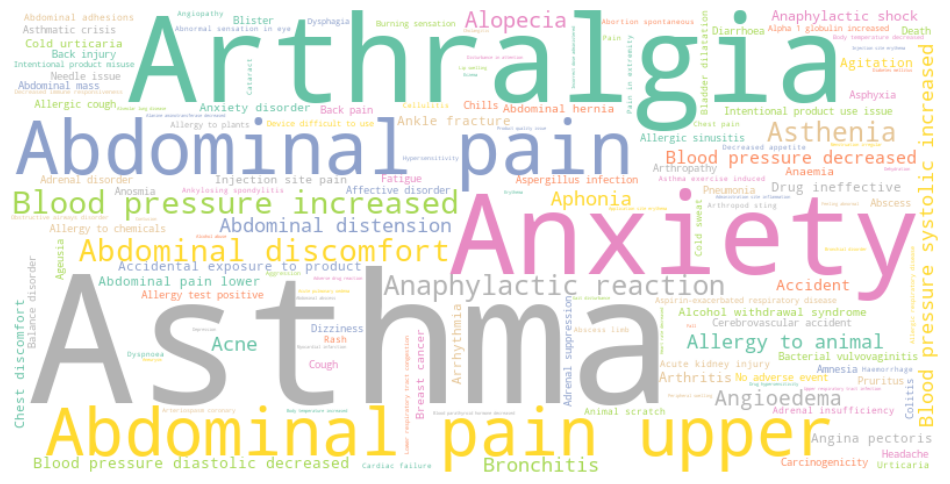

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd


top_20_reactions = data['pt'].value_counts().head(150)


reaction_dict = top_20_reactions.to_dict()

# Generating the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      colormap='Set2').generate_from_frequencies(reaction_dict)


plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.show()


In [ ]:
unique_values_counts = data['pt'].value_counts()
for value, count in unique_values_counts.items():
    print(f"{value}: {count}")


Asthma: 2355
Arthralgia: 870
Abdominal pain upper: 669
Anxiety: 639
Abdominal pain: 633
Asthenia: 522
Abdominal discomfort: 519
Blood pressure increased: 429
Anaphylactic reaction: 296
Alopecia: 260
Abdominal distension: 256
Drug ineffective: 214
Aphonia: 208
Acne: 207
Blood pressure systolic increased: 205
Allergy to animal: 202
Angioedema: 179
Bronchitis: 178
Blood pressure decreased: 146
Intentional product use issue: 124
Accident: 121
Injection site pain: 115
Blood pressure diastolic decreased: 115
Back pain: 105
Ankle fracture: 102
Agitation: 99
No adverse event: 90
Urticaria: 89
Arthritis: 87
Anaemia: 85
Pregnancy: 81
Arrhythmia: 70
Anaphylactic shock: 67
Asphyxia: 63
Abdominal pain lower: 63
Needle issue: 61
Chest discomfort: 59
Pruritus: 57
Allergic sinusitis: 55
Abdominal mass: 53
Fatigue: 52
Death: 52
Angina pectoris: 49
Dizziness: 47
Abdominal hernia: 47
Accidental exposure to product: 47
Rash: 47
Adrenal insufficiency: 47
Headache: 46
Cough: 43
Dyspnoea: 42
Malaise: 40
Anos

Total number of unique values in 'pt': 555
